In [46]:
import re
import pandas as pd

In [47]:
f=open('WhatsApp Chat with Naila Navratri🔥 💐🎈🌹🔥\WhatsApp Chat with Naila Navratri🔥 💐🎈🌹🔥.txt', 'r', encoding='utf8')

In [48]:
data=f.read()

In [49]:
print(data)

11/10/2024, 7:06 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
11/10/2024, 7:06 pm - ~ Abhash Varshney created group "Naila Navratri🔥 💐🎈🌹🔥"
11/10/2024, 7:06 pm - ~ Abhash Varshney added you
11/10/2024, 7:06 pm - Anjali Di Mahamaya: Acha
11/10/2024, 7:06 pm - Shalu Di Mahamaya: Are hum nhi gye h 😳😳
11/10/2024, 7:07 pm - Anjali Di Mahamaya: Ye group bna h naila k liye
11/10/2024, 7:07 pm - Anjali Di Mahamaya: Or hum ghar me baithe h
11/10/2024, 7:07 pm - Shalu Di Mahamaya: 🤣🤣🤣🤣
11/10/2024, 7:07 pm - Kusum: 🤣🤣🤣
11/10/2024, 7:07 pm - Shalu Di Mahamaya: Janbujh ke ye sab ho raha h
11/10/2024, 7:07 pm - +91 99269 15696: Light show chlega tb video call krta hu
11/10/2024, 7:07 pm - Kusum: group main video call karenge shyd
11/10/2024, 7:07 pm - Anjali Di Mahamaya: Acha acha
11/10/2024, 7:07 pm - Anjali Di Mahamaya: Khaogar to bhi kr lena fr
11/10/2024, 7:08 pm - +91 99269 15696: Dekhna 😍
11/10/2

In [50]:
pattern = r'\d{2}/\d{2}/\d{4},\s\d{1,2}:\d{2}\s?[apAP][mM]\s-\s'

In [51]:
messages=re.split(pattern, data)[1:]


In [52]:
dates=re.findall(pattern, data)


In [53]:
df=pd.DataFrame({ 'user_message':messages,'message_date':dates})
df['message_date']=pd.to_datetime(df['message_date'], format='%d/%m/%Y, %I:%M %p - ')
df.rename(columns={'message_date':'date'}, inplace=True)

df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2024-10-11 19:06:00
1,"~ Abhash Varshney created group ""Naila Navratr...",2024-10-11 19:06:00
2,~ Abhash Varshney added you\n,2024-10-11 19:06:00
3,Anjali Di Mahamaya: Acha\n,2024-10-11 19:06:00
4,Shalu Di Mahamaya: Are hum nhi gye h 😳😳\n,2024-10-11 19:06:00


In [54]:
df.shape

(243, 2)

In [55]:
users=[]
messages=[]
for message in df['user_message']:
    entry=re.split('([\w\W]+?):\s',message)
    if entry[1: ]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
df['user']=users
df['message']=messages
df.drop(columns=['user_message'], inplace=True)

df.head()

,date,user,message
0,2024-10-11 19:06:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2024-10-11 19:06:00,group_notification,"~ Abhash Varshney created group ""Naila Navratr..."
2,2024-10-11 19:06:00,group_notification,~ Abhash Varshney added you\n
3,2024-10-11 19:06:00,Anjali Di Mahamaya,Acha\n
4,2024-10-11 19:06:00,Shalu Di Mahamaya,Are hum nhi gye h 😳😳\n


In [56]:
df['year']=df['date'].dt.year

In [57]:
df['month']=df['date'].dt.month_name()

In [58]:
df['day']=df['date'].dt.day

In [59]:
df['hour']=df['date'].dt.hour

In [60]:
df['minute']=df['date'].dt.minute

In [61]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2024-10-11 19:06:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024,October,11,19,6
1,2024-10-11 19:06:00,group_notification,"~ Abhash Varshney created group ""Naila Navratr...",2024,October,11,19,6
2,2024-10-11 19:06:00,group_notification,~ Abhash Varshney added you\n,2024,October,11,19,6
3,2024-10-11 19:06:00,Anjali Di Mahamaya,Acha\n,2024,October,11,19,6
4,2024-10-11 19:06:00,Shalu Di Mahamaya,Are hum nhi gye h 😳😳\n,2024,October,11,19,6


In [62]:
df[df['user']=='Shalu Di Mahamaya'].shape

(29, 8)

In [63]:
words=[]
for message in df['message']:
    words.extend(message.split())

In [64]:
len(words)

682

In [65]:
import sys
print(sys.executable)


c:\Users\Asus\AppData\Local\Programs\Python\Python311\python.exe


In [66]:
from urlextract import URLExtract

extractor = URLExtract()
urls = extractor.find_urls("www.google.com is a great search engine")
print(urls)


['www.google.com']


In [67]:
links=[]
for message in df['message']:
    links.extend(extractor.find_urls(message))

In [68]:
print(len(links))

0


In [69]:
df

,date,user,message,year,month,day,hour,minute
0,2024-10-11 19:06:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024,October,11,19,6
1,2024-10-11 19:06:00,group_notification,"~ Abhash Varshney created group ""Naila Navratr...",2024,October,11,19,6
2,2024-10-11 19:06:00,group_notification,~ Abhash Varshney added you\n,2024,October,11,19,6
3,2024-10-11 19:06:00,Anjali Di Mahamaya,Acha\n,2024,October,11,19,6
4,2024-10-11 19:06:00,Shalu Di Mahamaya,Are hum nhi gye h 😳😳\n,2024,October,11,19,6
...,...,...,...,...,...,...,...,...
238,2024-12-16 17:38:00,+91 91096 63182,<Media omitted>\n,2024,December,16,17,38
239,2024-12-16 17:38:00,+91 91096 63182,<Media omitted>\n,2024,December,16,17,38
240,2024-12-16 17:38:00,+91 91096 63182,<Media omitted>\n,2024,December,16,17,38
241,2024-12-16 17:38:00,+91 91096 63182,<Media omitted>\n,2024,December,16,17,38


In [70]:
x=df['user'].value_counts().head()

In [71]:
import matplotlib.pyplot as plt

In [72]:
def most_busy_users(df):
    if 'user' in df.columns:
        user_counts = df['user'].value_counts()
        return user_counts
    else:
        return None


([0, 1, 2, 3, 4],
 [Text(0, 0, '+91 91096 63182'),
  Text(1, 0, 'Happy Bahiya'),
  Text(2, 0, '+91 91743 47310'),
  Text(3, 0, 'Shalu Di Mahamaya'),
  Text(4, 0, 'Monika Di Mahamaya')])

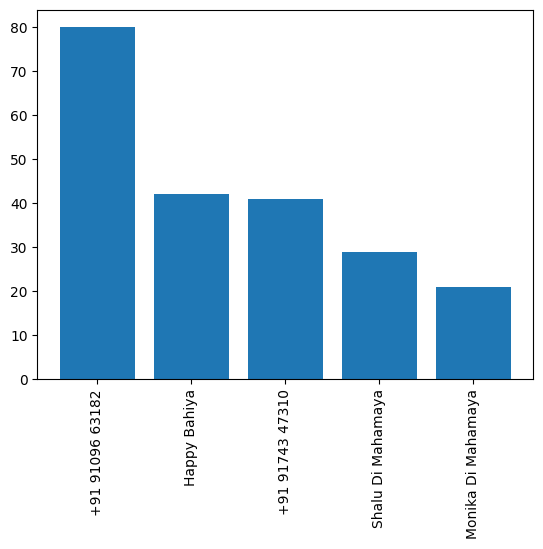

In [73]:
name=x.index
count=x.values
plt.bar(name,count)
plt.xticks(rotation="vertical" )

In [74]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'Name', 'user':'percent'})

,Name,percent
0,+91 91096 63182,32.92
1,Happy Bahiya,17.28
2,+91 91743 47310,16.87
3,Shalu Di Mahamaya,11.93
4,Monika Di Mahamaya,8.64
5,Anjali Di Mahamaya,6.17
6,group_notification,2.06
7,Kusum,2.06
8,+91 99269 15696,1.65
9,+91 94790 41304,0.41


In [75]:
temp=df[df['user']!='group_notification']
temp=temp[temp['message']!= '<Media omitted>\n']

In [76]:
f=open('stop_hinglish.txt','r')
stop_words=f.read()

In [77]:
words=[]
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [78]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,video,3
1,??,3
2,science,3
3,college,3
4,group,2
5,call,2
6,network,2
7,ground,2
8,7:30,2
9,😳😳,1


In [79]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [80]:
import emoji

emojis = []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])


In [81]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,🤣,13
1,😂,3
2,🔥,2
3,😳,2
4,💐,1
5,🎈,1
6,🌹,1
7,😍,1
8,😜,1
9,🤩,1


In [82]:
df['month_num']=df['date'].dt.month


In [83]:
timeline=df.groupby(['year','month_num']).count()['message'].reset_index()

In [84]:
time=[]
for i in range(timeline.shape[0]):
    time.append(str(timeline['year'][i])+'-'+str(timeline['month_num'][i]))

In [85]:
timeline['time']=time

In [86]:
timeline

,year,month_num,message,time
0,2024,10,129,2024-10
1,2024,11,86,2024-11
2,2024,12,28,2024-12


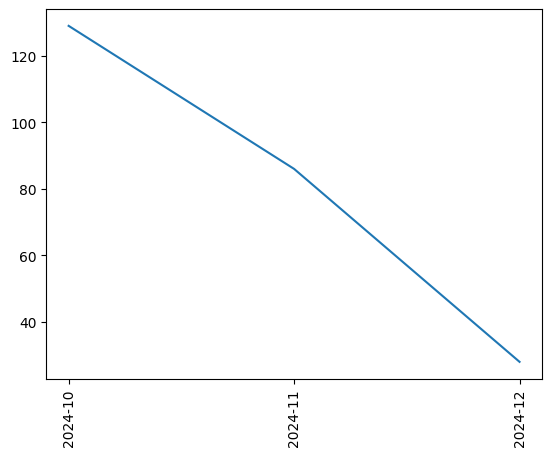

In [87]:
plt.plot(timeline['time'], timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [90]:
df['only_date']=df['date'].dt.date

In [92]:
daily_timeline=df.groupby('only_date').count()['message'].reset_index()

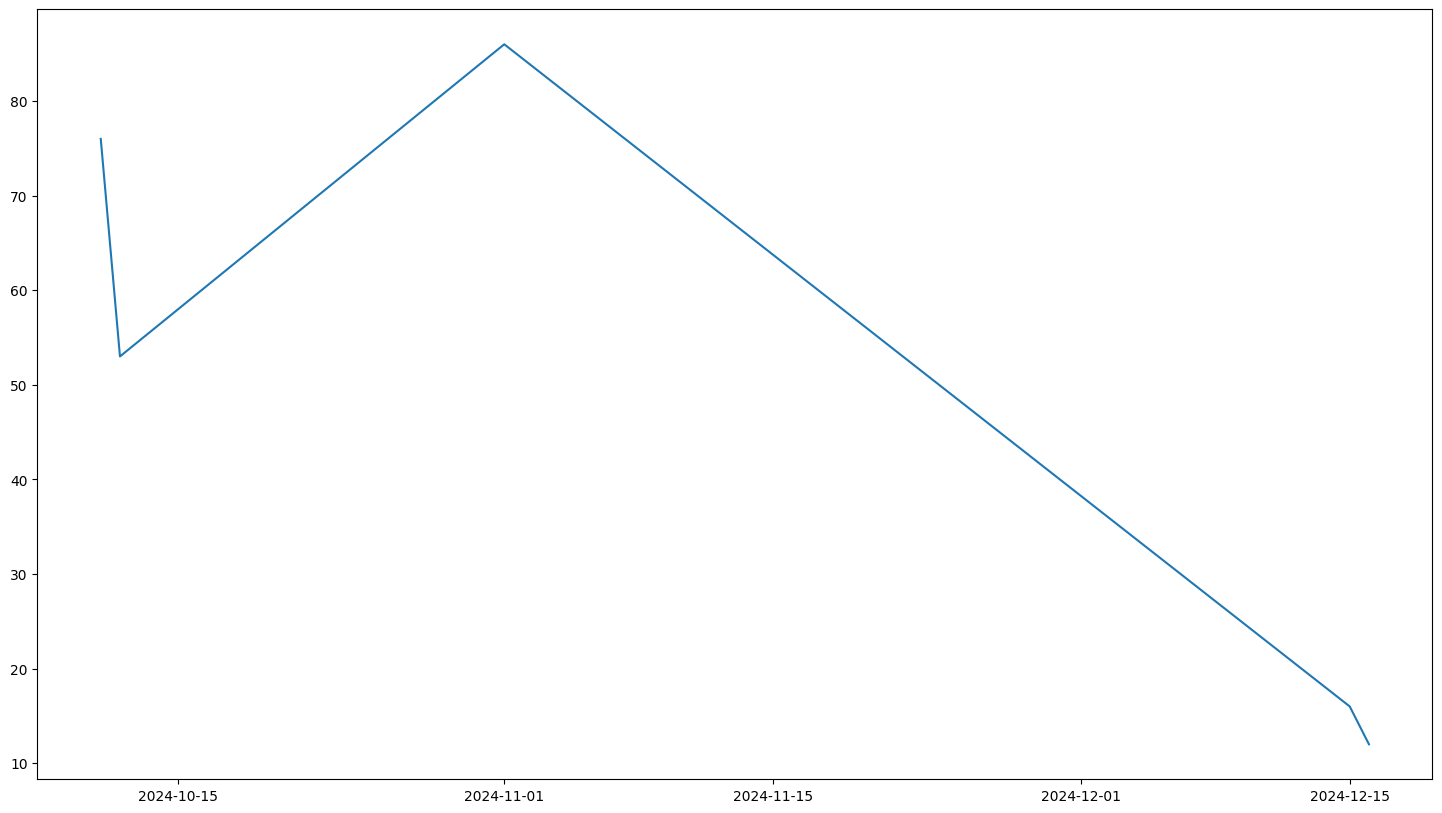

In [95]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'], daily_timeline['message'])

In [96]:
df['day_name']=df['date'].dt.day_name()

In [97]:
df['day_name'].value_counts()

Friday      162
Saturday     53
Sunday       16
Monday       12
Name: day_name, dtype: int64

In [99]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name
0,2024-10-11 19:06:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024,October,11,19,6,10,2024-10-11,Friday
1,2024-10-11 19:06:00,group_notification,"~ Abhash Varshney created group ""Naila Navratr...",2024,October,11,19,6,10,2024-10-11,Friday
2,2024-10-11 19:06:00,group_notification,~ Abhash Varshney added you\n,2024,October,11,19,6,10,2024-10-11,Friday
3,2024-10-11 19:06:00,Anjali Di Mahamaya,Acha\n,2024,October,11,19,6,10,2024-10-11,Friday
4,2024-10-11 19:06:00,Shalu Di Mahamaya,Are hum nhi gye h 😳😳\n,2024,October,11,19,6,10,2024-10-11,Friday


In [104]:
period = []

# Ensure the DataFrame contains 'hour' as an integer column
for hour in df['hour']:
    if hour == 23:
        period.append(f"{hour}-00")
    elif hour == 0:
        period.append("00-1")
    else:
        period.append(f"{hour}-{hour+1}")


In [105]:
df['period']=period

In [107]:
df.sample(5)

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
232,2024-12-16 17:38:00,+91 91096 63182,<Media omitted>\n,2024,December,16,17,38,12,2024-12-16,Monday,17-18
144,2024-11-01 19:24:00,group_notification,~ Abhash Varshney added Bhaiii (Ishu) and ~ Hi...,2024,November,1,19,24,11,2024-11-01,Friday,19-20
181,2024-11-01 21:52:00,+91 91096 63182,<Media omitted>\n,2024,November,1,21,52,11,2024-11-01,Friday,21-22
118,2024-10-12 23:39:00,Shalu Di Mahamaya,<Media omitted>\n,2024,October,12,23,39,10,2024-10-12,Saturday,23-00
73,2024-10-11 19:38:00,Happy Bahiya,<Media omitted>\n,2024,October,11,19,38,10,2024-10-11,Friday,19-20


In [111]:
pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


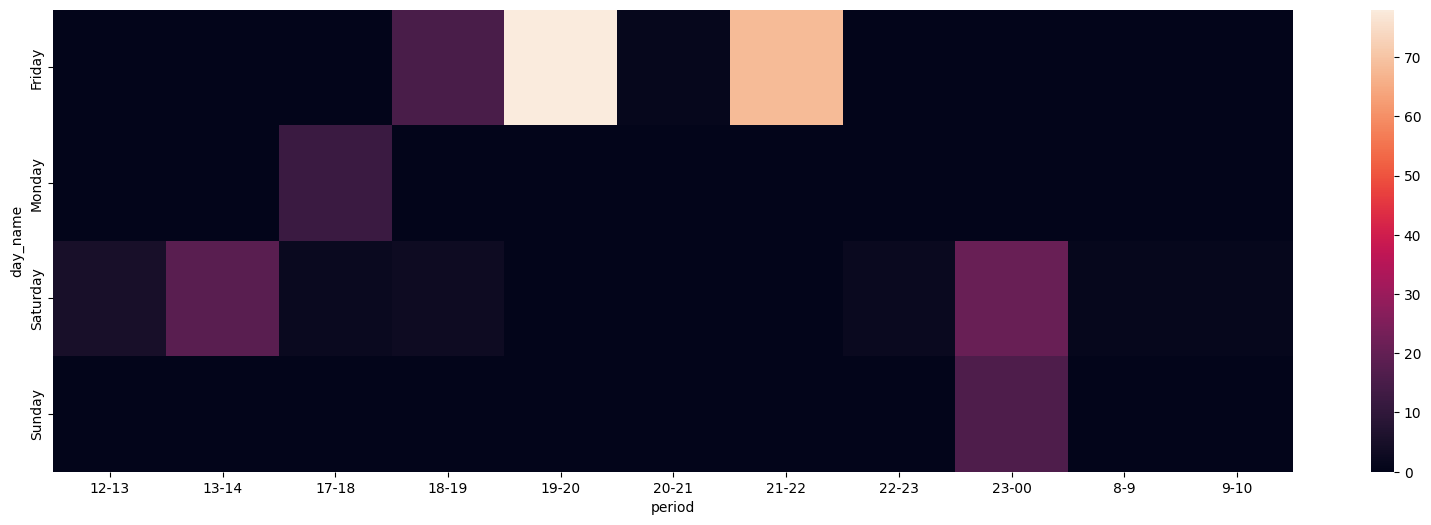

In [113]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0))
plt.xticks(rotation="horizontal")
plt.show()